## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Suppress Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [4]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\loan\loan.csv')

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(39717, 111)

In [7]:

df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

In [8]:
#Make a list of all the the columns that contain maximum numer of missing or undefined values
list_of_columns_to_drop=['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint',
                         'tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                         'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
                         'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal',
                         'bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
                         'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
                         'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
                         'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
                         'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
                         'percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

In [9]:
#Drop the above listed columns
df.drop(list_of_columns_to_drop,inplace=True,axis=1)

In [10]:
#Now check for the remaining no. of rows and columns
df.shape

(39717, 57)

In [11]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,1140,39715,39661.0,39717.0,39717,39717.0,39661.0,39717.0,39020.000000,39678.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,2,106,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,Jun-16,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,1125,10308,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0


In [12]:
#Checking for the unique values
print(df['id'].duplicated().any())
print(df['member_id'].duplicated().any())
print(df['url'].duplicated().any())
print(df['pymnt_plan'].duplicated().any(),df['pymnt_plan'].unique())
print(df['initial_list_status'].duplicated().any(),df['initial_list_status'].unique())
print(df['acc_now_delinq'].duplicated().any(),df['acc_now_delinq'].unique())
print(df['application_type'].duplicated().any(),df['application_type'].unique())
print(df['chargeoff_within_12_mths'].duplicated().any(),df['chargeoff_within_12_mths'].unique())
print(df['delinq_amnt'].duplicated().any(),df['delinq_amnt'].unique())
print(df['tax_liens'].duplicated().any(),df['tax_liens'].unique())


False
False
False
True ['n']
True ['f']
True [0]
True ['INDIVIDUAL']
True [ 0. nan]
True [0]
True [ 0. nan]


In [13]:
#Dropping unique values
df.drop(['id','member_id','url','pymnt_plan','initial_list_status','acc_now_delinq','application_type',
         'chargeoff_within_12_mths','delinq_amnt','tax_liens','collections_12_mths_ex_med'],inplace=True,axis=1)

In [14]:
#Checking for the percentage of null values
df.isnull().sum()/df.shape[0]*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
p

In [15]:
#Removing Columns having more than 90% Null Values
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],inplace=True,axis=1)

In [16]:
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715,39717.0,39020.000000
unique,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,...,NaN,NaN,NaN,NaN,NaN,101,NaN,106,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,...,NaN,NaN,NaN,NaN,NaN,May-16,NaN,May-16,NaN,NaN
freq,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,...,NaN,NaN,NaN,NaN,NaN,1256,NaN,10308,NaN,NaN
mean,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,...,9793.348813,2263.663172,1.363015,95.221624,12.406112,NaN,2678.826162,NaN,1.0,0.043260
std,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,NaN,NaN,...,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN,0.0,0.204324
min,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.0,0.000000
25%,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,NaN,NaN,...,4600.000000,662.180000,0.000000,0.000000,0.000000,NaN,218.680000,NaN,1.0,0.000000
50%,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,NaN,NaN,...,8000.000000,1348.910000,0.000000,0.000000,0.000000,NaN,546.140000,NaN,1.0,0.000000
75%,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,NaN,NaN,...,13653.260000,2833.400000,0.000000,0.000000,0.000000,NaN,3293.160000,NaN,1.0,0.000000


In [17]:
df.duplicated().any()

False

######  There are no duplicated rows in the dataset

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
#Removing current loan status
df=df[df['loan_status']!='Current']

In [20]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [21]:
df['Fully_Paid']=df.loan_status.apply(lambda x:1 if x=='Fully Paid' else 0)

In [22]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [23]:
df['Fully_Paid'].value_counts()

1    32950
0     5627
Name: Fully_Paid, dtype: int64

In [24]:
#Checking for null values
df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_

In [25]:
#filling null values in emp_title with none
df['emp_title']=df['emp_title'].fillna('None')
df['emp_title'].isnull().sum()

0

In [26]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [27]:
#filling null values in emp_length with unknown
df['emp_length']=df['emp_length'].fillna('UnKnown')
df['emp_length'].isnull().sum()

0

In [28]:
print('No.of Null Values before Cleaning ',df['title'].isnull().sum())
print("Number of Differernt Titles are: ",len(df['title'].unique()))
df['title']=df['title'].fillna('UnKnown')
print('No.of Null Values after Cleaning ',df['title'].isnull().sum())

No.of Null Values before Cleaning  11
Number of Differernt Titles are:  19298
No.of Null Values after Cleaning  0


##### Dropping unnecessary columns null values

In [29]:
df['pub_rec_bankruptcies'].value_counts()


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [30]:
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [31]:
df.shape

(38577, 43)

In [32]:
df.dropna(subset=['last_pymnt_d','revol_util','last_credit_pull_d'],inplace=True)

In [33]:
df.drop('desc',axis=1,inplace=True)

In [34]:
df.shape

(38458, 42)

In [35]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [36]:
#There are no null values

In [37]:
df['int_rate']=df['int_rate'].apply(lambda x:float(x.strip('%')))

In [38]:
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%y')

In [39]:
df['issue_year']=df.issue_d.dt.year
df['issue_month']=df.issue_d.dt.month
df.drop(['issue_d'],axis=1,inplace=True)

In [40]:
df['annual_inc'].describe()

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [41]:
df['annual_inc'].mean()

68845.5024624266

In [42]:
df['annual_inc'].max()

6000000.0

Text(0, 0.5, 'Density')

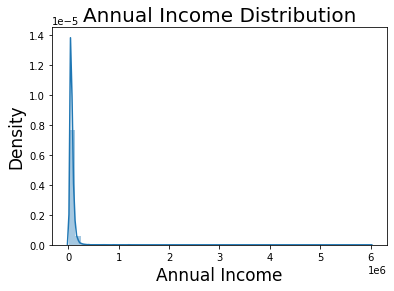

In [43]:
plt.figure(figsize=(6,4))
sns.distplot(df['annual_inc'])
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel("Annual Income", fontsize=17)
plt.ylabel("Density", fontsize=17)

In [44]:
num=np.quantile(df['annual_inc'],0.99)
df=df[df['annual_inc']<num]

In [45]:
df['annual_inc'].describe()

count     38073.000000
mean      65380.939929
std       35150.175534
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [46]:
df['income_range']=df['annual_inc'].apply(lambda x:'low' if x<40000 else 'medium' if x>40000 and x<80400 else 'High')

In [47]:
df['income_range'].value_counts()

medium    18909
High      10384
low        8780
Name: income_range, dtype: int64

### Univariate Analysis

#### 1. Annual Income

In [48]:
data=sorted(df['annual_inc'],reverse=True)
data={'rank':np.arange(1,len(data)+1).astype('int'),'annual_income':data}
data=pd.DataFrame(data)
data.head()

,rank,annual_income
0,1,234000.0
1,2,234000.0
2,3,234000.0
3,4,234000.0
4,5,233004.0


Text(0, 0.5, 'Loan Amount')

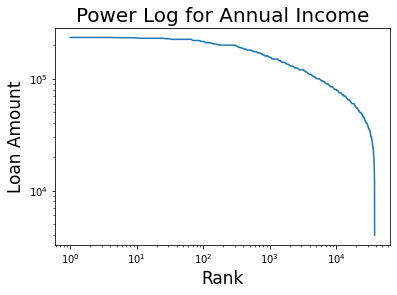

In [49]:
sns.lineplot(x=data['rank'],y=data['annual_income'])
plt.yscale('log')
plt.xscale('log')
plt.title("Power Log for Annual Income", fontsize=20)
plt.xlabel("Rank", fontsize=17)
plt.ylabel("Loan Amount", fontsize=17)

#### 2. Interest rate

Text(0, 0.5, 'Interest Rate')

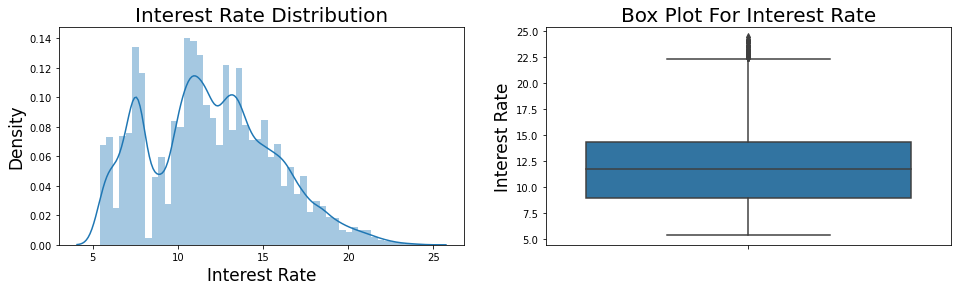

In [50]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['int_rate'])
plt.title("Interest Rate Distribution", fontsize=20)
plt.xlabel("Interest Rate", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y=df['int_rate'])
plt.title("Box Plot For Interest Rate", fontsize=20)
plt.ylabel("Interest Rate", fontsize=17)

#### 3. Loan Amount

In [51]:
df['loan_amnt'].describe()

count    38073.000000
mean     10974.907415
std       7264.423553
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

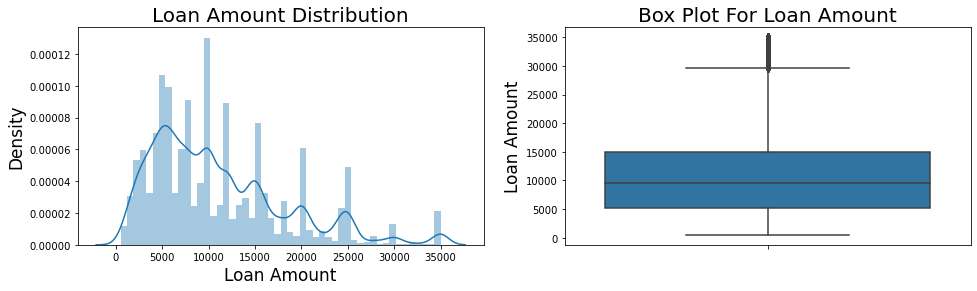

In [52]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['loan_amnt'])
plt.title("Loan Amount Distribution", fontsize=20)
plt.xlabel("Loan Amount", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y=df['loan_amnt'])
plt.title("Box Plot For Loan Amount", fontsize=20)
plt.ylabel("Loan Amount", fontsize=17)

#### 4. Loan Status

Text(0, 0.5, 'Value Count')

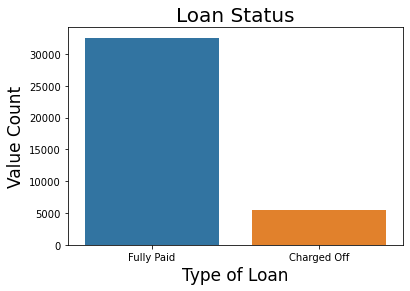

In [53]:
sns.countplot(x='loan_status',data=df)
plt.title("Loan Status", fontsize=20)
plt.xlabel("Type of Loan", fontsize=17)
plt.ylabel("Value Count", fontsize=17)

#### 5. Installment

Text(0, 0.5, 'Installment')

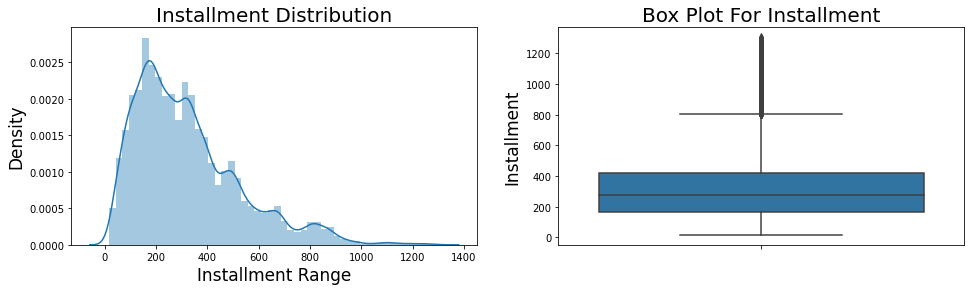

In [54]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(y='installment',data=df)
plt.title("Box Plot For Installment", fontsize=20)
plt.ylabel("Installment", fontsize=17)

#### 6. Term

Text(0, 0.5, 'Value count')

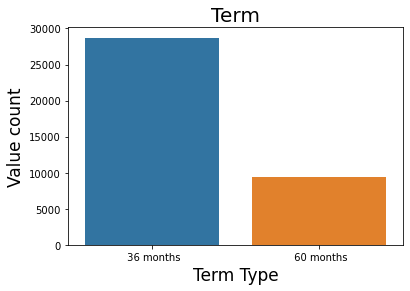

In [55]:
sns.countplot(x='term',data=df)
plt.title("Term", fontsize=20)
plt.xlabel("Term Type", fontsize=17)
plt.ylabel("Value count", fontsize=17)

### Bivariate/Mutivariate Analysis

In [56]:
df['annual_inc'].describe()

count     38073.000000
mean      65380.939929
std       35150.175534
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [57]:
df['income_range'].value_counts()

medium    18909
High      10384
low        8780
Name: income_range, dtype: int64

#### 1. Income Range vs Installment

Text(0, 0.5, 'Installment')

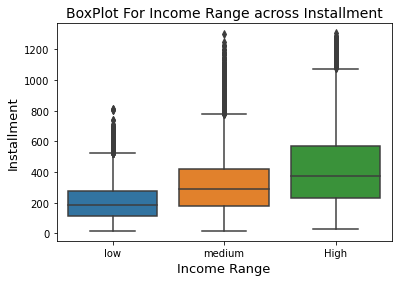

In [58]:
sns.boxplot(x='income_range',y='installment',data=df)
plt.title("BoxPlot For Income Range across Installment", fontsize=14)
plt.xlabel("Income Range", fontsize=13)
plt.ylabel("Installment", fontsize=13)

##### We can see that the installment is rising as the Income Range is getting high

#### 2. Loan Status vs Loan Amount

Text(0, 0.5, 'Loan Amount')

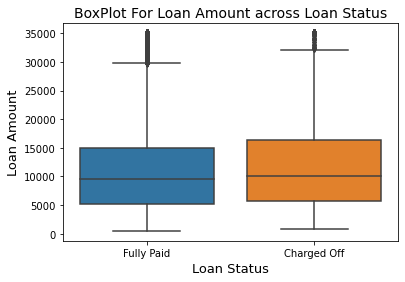

In [59]:
sns.boxplot(y='loan_amnt',x='loan_status',data=df)
plt.title("BoxPlot For Loan Amount across Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("Loan Amount", fontsize=13)

##### From the above diagram we can see that the median of loan_amount of charged-off people is high.

#### 3. Loan Status vs Installment

Text(0, 0.5, 'Installment')

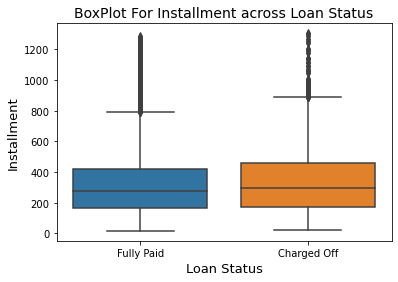

In [60]:
sns.boxplot(x=df['loan_status'],y=df['installment'])
#plt.yscale('log')
plt.title("BoxPlot For Installment across Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("Installment", fontsize=13)

##### From the above diagram we can see that the median of Installment of charged-off is high. 

#### 4. Term vs Loan Amount

Text(0, 0.5, 'Loan Amount')

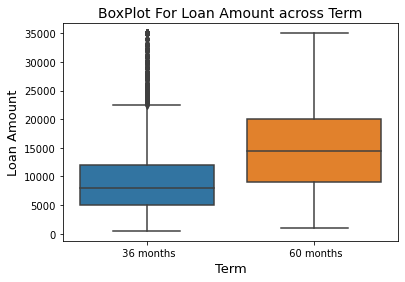

In [61]:
sns.boxplot(x=df['term'],y=df['loan_amnt'])
plt.title("BoxPlot For Loan Amount across Term", fontsize=14)
plt.xlabel("Term", fontsize=13)
plt.ylabel("Loan Amount", fontsize=13)

##### We can infer that the average Loan Amount of people whose term is 5 years is more than that of 3 years

#### 5. Loan Status vs No. of Open credit lines

Text(0, 0.5, 'No. of open Credit lines')

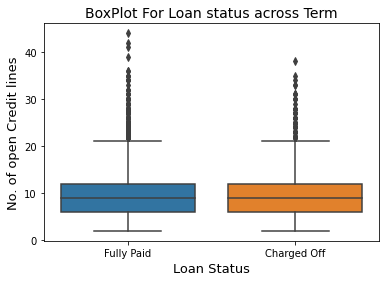

In [62]:
sns.boxplot(x=df['loan_status'],y=df['open_acc'])
plt.title("BoxPlot For Loan status across Term", fontsize=14)
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("No. of open Credit lines", fontsize=13)

##### We can see that median of both loan status are similar and lie in the same range of open credit lines

#### 6. Grade vs Interest Rate

Text(0, 0.5, 'Interest Rate')

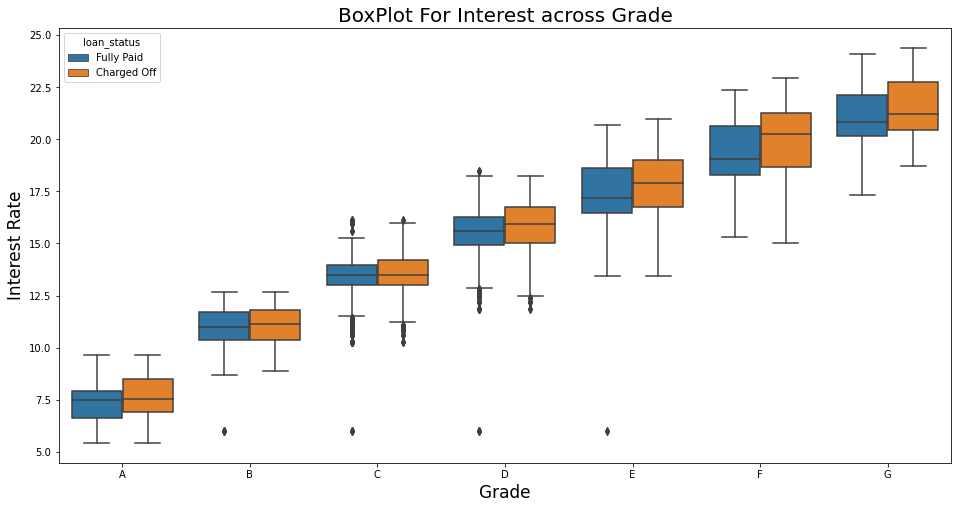

In [63]:
plt.figure(figsize=(16,8))
sns.boxplot(x='grade',y='int_rate',hue='loan_status',data=df,order=sorted(df['grade'].unique()))
plt.title("BoxPlot For Interest across Grade", fontsize=20)
plt.xlabel("Grade", fontsize=17)
plt.ylabel("Interest Rate", fontsize=17)

##### We can see that the grade of the loan decreases with the increase in the interest rate

#### 7. Sub-grade vs Interest Rate

Text(0, 0.5, 'Interest Rate')

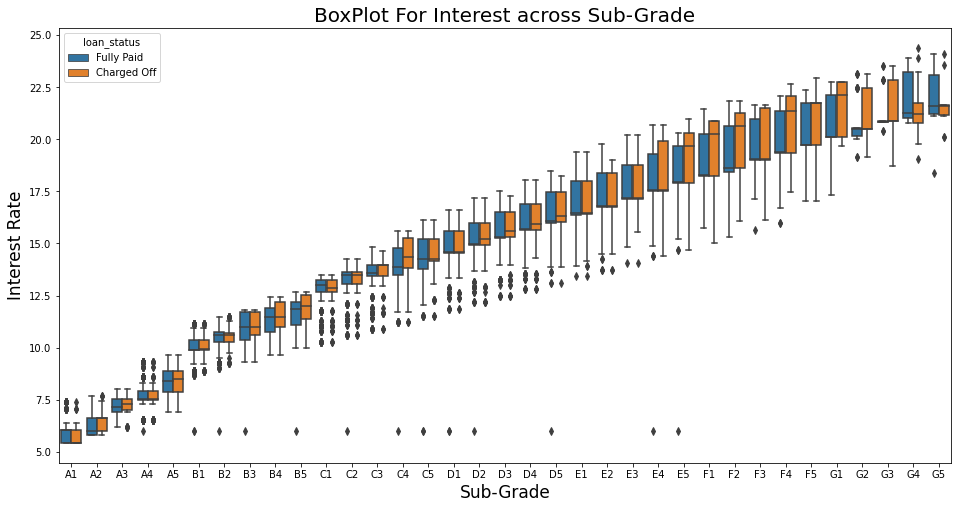

In [64]:
plt.figure(figsize=(16,8))
sns.boxplot(x='sub_grade',y='int_rate',hue='loan_status',data=df,order=sorted(df['sub_grade'].unique()))
plt.title("BoxPlot For Interest across Sub-Grade", fontsize=20)
plt.xlabel("Sub-Grade", fontsize=17)
plt.ylabel("Interest Rate", fontsize=17)

##### We can infer from the above two graphs that the median of interest is gradually increasing from A to G 

#### 8. Home ownership vs Loan Status vs Verisfication Status

Text(0, 0.5, 'Count')

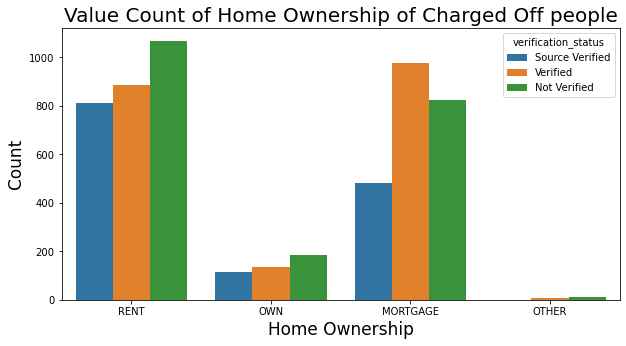

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership',data=df[df['loan_status']=='Charged Off'],hue='verification_status')
plt.title("Value Count of Home Ownership of Charged Off people", fontsize=20)
plt.xlabel("Home Ownership", fontsize=17)
plt.ylabel("Count", fontsize=17)

###### We can see that the people whose home_ownership are RENT and MORTAGE are most like to be charged-off

#### 9. Term vs Loan Status

In [66]:
df.groupby(['term'])['loan_status'].value_counts(normalize=True)

term        loan_status
 36 months  Fully Paid     0.890777
            Charged Off    0.109223
 60 months  Fully Paid     0.747327
            Charged Off    0.252673
Name: loan_status, dtype: float64

###### From the above statistics we can say that the people who are taking loan for 5 years term are most likely to be charged-off

#### 10. Issued Year vs Count of Loans(Fully paid and Charged-off)

<AxesSubplot:xlabel='issue_year', ylabel='count'>

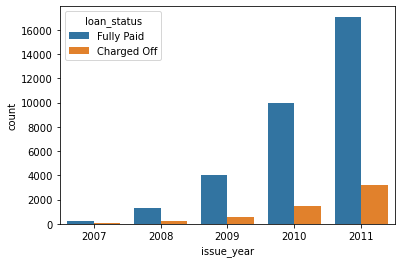

In [67]:
sns.countplot(x='issue_year',hue='loan_status',data=df)

#### 11. Issued Month vs Count of Loans(Fully paid and Charged-off)

<AxesSubplot:xlabel='issue_month', ylabel='count'>

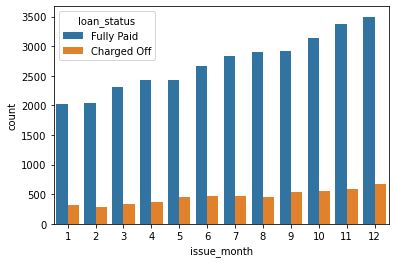

In [68]:
sns.countplot(x='issue_month',hue='loan_status',data=df)

#### 12.  Issued Year vs Interest Rate

<AxesSubplot:xlabel='issue_year', ylabel='int_rate'>

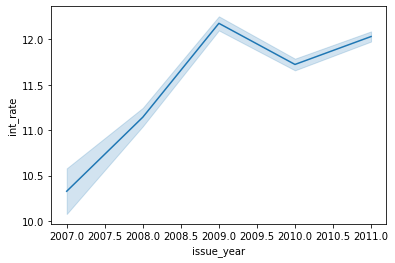

In [69]:
sns.lineplot(x='issue_year',y='int_rate',data=df)

###### From the above lineplot we can see that there is a steady increase in the interest rate upto the year 2007 then it slightly decreased from 2009 to 2010. The main reason may be Recession.

#### 13. Issued Month vs Interest Rate

<AxesSubplot:xlabel='issue_month', ylabel='int_rate'>

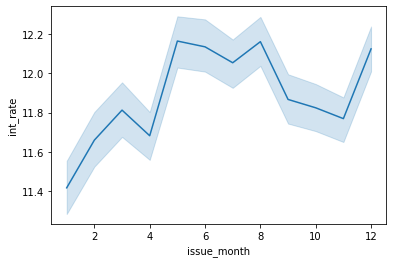

In [70]:
sns.lineplot(x='issue_month',y='int_rate',data=df)

###### From the above lineplot we can see that there is a constant change in the interest rate every couple of days.

#### 14. Loan Status vs Installment vs Home Ownership

Text(0, 0.5, 'Installment')

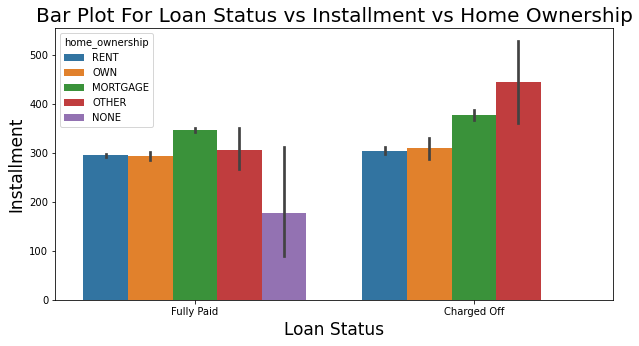

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status', y='installment',hue='home_ownership', data=df)
plt.title("Bar Plot For Loan Status vs Installment vs Home Ownership", fontsize=20)
plt.xlabel("Loan Status", fontsize=17)
plt.ylabel("Installment", fontsize=17)

##### We can see that the number of installments for the fully paid and charged-off loans of rented houses and own houses are almost similar and slightly greater for the mortgaged and other houses

#### 15. Loan Status vs No. of Open Credit Lines vs Home Ownership

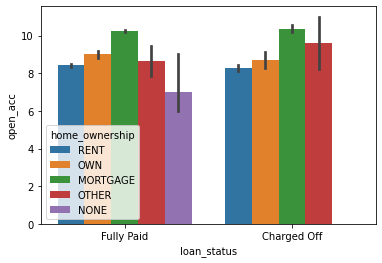

In [72]:
sns.barplot(x='loan_status', y='open_acc',hue='home_ownership', data=df)
plt.show()

#### 16. Loan Status vs Installment vs Term

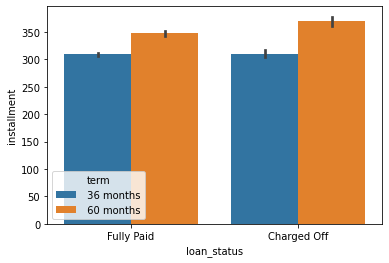

In [73]:
sns.barplot(x='loan_status', y='installment',hue='term', data=df)
plt.show()